# INTRODUCTION

The World Bank’s ESG Data Draft dataset provides information on 17 key sustainability themes spanning environmental, social, and governance categories.

More information can be found on the __World Bank__ [website](https://esgdata.worldbank.org/?lang=en).

The data as well as information about the indicators can be found [here](https://datacatalog.worldbank.org/search/dataset/0037651).

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# DATA WRANGLING

1. Creating the Dataframes

I will fetch the two CSV files containing:

   The [Dataset](https://esgdata.worldbank.org/data/download?lang=en) CSV file containing the World Bank ESG data ranging from 1960 to 2022;
   
   The [Framework](https://esgdata.worldbank.org/data/download?lang=en) CSV file which contains the:
   
        - Pillar (theme);
        - Group;
        - indicator (abbreviated form);
        - indicator (complete form).

In [2]:
#Fetch the two CSV files into a DataFrame object.

df = pd.read_csv("/Users/alexiskorpas/Python ready text files/Projects/Dash/sovereignesg-data_2022-12-12.csv", low_memory = False)
df_framework = pd.read_csv("/Users/alexiskorpas/Python ready text files/Projects/Dash/sovereignesg-framework_2022-12-12.csv")


2. Data cleaning

In [3]:
#first look at main dataset
df.head()

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,...,58.067580,58.067580,58.067580,58.067580,58.06757957,58.06757957,58.08136507,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,...,43.011249,43.456474,43.901699,44.346924,44.79215529,45.23737066,45.68259405,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,45.401460,...,43.843066,43.332117,42.857299,42.857664,43.12773723,42.67083942,42.84967153,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,39.914894,40.021277,40.000000,40.021277,40.04255319,40.04255319,40.06382979,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,...,5.304140,5.342157,5.385807,5.390031,5.404111518,5.404111518,5.375246409,NaN,NaN,NaN


In [4]:
#check data types of our columns
df.dtypes.value_counts()

float64    49
object     15
dtype: int64

In [5]:
#check which columns that are supposed to have numerical figures have their values as objects
for i in range(len([i for i in df.dtypes.index])):
    if df.dtypes[i] == 'object':
        print([x for x in df.dtypes.index][i], df.dtypes[i])

iso3 object
ind object
1995 object
1996 object
1997 object
1998 object
1999 object
2000 object
2001 object
2002 object
2003 object
2004 object
2016 object
2017 object
2018 object


It seems that certain columns that are supposed numerical data appear in our dataframe having their values as objects. Therefore, let's change that.

We will first need to not select the columns "iso3" and "ind" in our modification processing as the data type of these columns should remain intact.

I will create a list of the years that we have and map them as strings in order to refere solely to the years between 1960-2021.

In [6]:
#create a variable "years" to use it as an iterable
years = list(map(str,range(1960,2022)))

Let's try to convert the values to float64. We will insert the code inside a try - except block in order to see if there will be any error in the code and we will print the message in case there is an error.

In [7]:
try:
    for i in years:
        if df[i].dtype.name == 'object':
            df[i] = df[i].astype('float64')
    print("Conversion successful!")
except ValueError as e:
    print(e)

could not convert string to float: '..'


The error that occurs shows that there are parts of the dataset with the value ".." which is invalid. We will need to replace this with a nan value and then we will replace all nan values with float64 dtype.

In [8]:
#convert all numerical columns' content from string to float64
df[years] = df[years].replace('..', float('nan'))
df[years] = df[years].astype('float64')

In [9]:
#check dimensions of main dataframe
df.shape

(24355, 64)

In [10]:
#there are 23455 rows and 64 columns.
#We will check if the sum of nan values for each column equals the sum of rows of the dataframe. 
#If yes, that means that the column does not have any actual values and therefore we will delete these columns.

for i in map(str,range(1960,2022)):
    if df[i].isna().value_counts()[0] == df.shape[0]:
        print("Column " + df[i].name + " deleted")
        df.drop(i, axis = 1, inplace = True)

In [11]:
#Let's re-check the main dataframe
df.shape

(24355, 64)

__Inference__: All columns have data. Therefore any further null or nan values treatment will be done at a later stage.

Now I will clean the framework dataset to make it easier for processing.

In [12]:
#first look at the framework dataset
df_framework.head()

,pillar,group,ind,indicator,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Environment,Emissions & pollution,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Environment,Emissions & pollution,EN.ATM.CO2E.KT,CO2 emissions (kt),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Environment,Emissions & pollution,EN.CLC.GHGR.MT.CE,GHG net emissions/removals by LUCF (Mt of CO2 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Environment,Emissions & pollution,EN.ATM.METH.PC,Methane emissions (metric tons of CO2 equivale...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Environment,Emissions & pollution,EN.ATM.NOXE.PC,Nitrous oxide emissions (metric tons of CO2 eq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#drop columns with name "Unnamed" in the df_framework dataframe
for column in df_framework.columns:
    if "Unnamed" in column:
        df_framework.drop([column], axis = 1, inplace = True)

In [14]:
#re-inspect framework dataframe
df_framework

,pillar,group,ind,indicator
0,Environment,Emissions & pollution,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
1,Environment,Emissions & pollution,EN.ATM.CO2E.KT,CO2 emissions (kt)
2,Environment,Emissions & pollution,EN.CLC.GHGR.MT.CE,GHG net emissions/removals by LUCF (Mt of CO2 ...
3,Environment,Emissions & pollution,EN.ATM.METH.PC,Methane emissions (metric tons of CO2 equivale...
4,Environment,Emissions & pollution,EN.ATM.NOXE.PC,Nitrous oxide emissions (metric tons of CO2 eq...
...,...,...,...,...
67,Governance,Innovation,IP.JRN.ARTC.SC,Scientific and technical journal articles
68,Governance,Stability & Rule of Law,CC.EST,Control of Corruption: Estimate
69,Governance,Stability & Rule of Law,SM.POP.NETM,Net migration
70,Governance,Stability & Rule of Law,PV.EST,Political Stability and Absence of Violence/Te...


Now I want to merge the two dataframes in order to add the following information in the main dataframe:

    - The Pillar(Environment, Social or Governane);
    - The Group
    - The indicator (complete form).

In [15]:
#Merge the dataframes using id as a common match.
new_df = pd.merge(df, df_framework[['ind', 'pillar','group', 'indicator']],
                     on = 'ind', #merge the dataframes based on the value indicator,
                     how = 'left')

In [16]:
#let's look at the new dataframe
new_df.head()

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,pillar,group,indicator
0,AFG,AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,...,58.067580,58.067580,58.067580,58.081365,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area)
1,AGO,AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,...,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area)
2,ALB,AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,45.401460,...,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area)
3,AND,AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,40.021277,40.042553,40.042553,40.063830,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area)
4,ARE,AG.LND.AGRI.ZS,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,...,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area)


It is time to import the dataframe which contains important information such as:

- Name;
- Region (i.e. Continent);
- Sub-Region

The dataframe was taken from [here](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv).

The goal is to merge the dataframe new_df and the columns of this dataframe in order to have a dataframe that includes not only the years and all ESG data, but the full country names and the continents thereof.

In [17]:
#import the dataframe to match the three letters country codes to the full country name, and continent.
#this dataframe has been taken from 
#https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
#and it has been downloaded to a local drive

countries = pd.read_csv("/Users/alexiskorpas/Library/Mobile Documents/com~apple~CloudDocs/LEARNING/Python/Datasets/all.csv")

In [18]:
#let's look at the dataframe
countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [19]:
#rename the column alpha-3 to iso3 so that we can merge the two dataframes
countries.rename(columns = {'alpha-3': 'iso3', 'region': 'continent', 'name': 'country'}, inplace = True)

In [20]:
#match the merged dataframe with the columns name, region, sub-region
df_merged = pd.merge(new_df, countries[['country','iso3', 'continent', 'sub-region']],
                     on ='iso3',#merge the dataframes based on the value indicator,
                     how = 'left')
print('Dataframes merged!')

Dataframes merged!


In [21]:
#inspect the merged dataframe
df_merged.head()

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2018,2019,2020,2021,pillar,group,indicator,country,continent,sub-region
0,AFG,AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,...,58.081365,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Afghanistan,Asia,Southern Asia
1,AGO,AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,...,45.682594,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Angola,Africa,Sub-Saharan Africa
2,ALB,AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,45.401460,...,42.849672,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Albania,Europe,Southern Europe
3,AND,AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,40.063830,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Andorra,Europe,Southern Europe
4,ARE,AG.LND.AGRI.ZS,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,...,5.375246,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),United Arab Emirates,Asia,Western Asia


In [22]:
#inspect the column pillar to see if there are any nan values
df_merged['pillar'].unique()

array(['Environment', 'Governance', 'Social', nan], dtype=object)

In [23]:
#replace nan value as "unknown" in the pillar column of the merged dataframe
df_merged['pillar'].replace(np.nan, "Undefined", inplace = True)

In [24]:
#check the indicators which are unknown and did not have a description in the framework file.
df_merged[df_merged['pillar'] == 'Undefined']['ind'].unique()

array(['EN.CLC.MDAT.ZS', 'EN.CLC.PRCP.XD', 'IC.BUS.EASE.XQ',
       'AG.SRF.TOTL.K2', 'FP.CPI.TOTL.ZG', 'HD.HCI.OVRL',
       'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'SP.POP.GROW', 'SP.POP.TOTL',
       'NW.HCA.TO', 'NW.HCA.PC', 'NW.HCA.FEMP.PC', 'NW.HCA.MEMP.PC',
       'NW.HCA.FEMA.PC', 'NW.HCA.MALE.PC', 'NW.HCA.FSEM.PC',
       'NW.HCA.MSEM.PC', 'NW.HCA.FEMP.TO', 'NW.HCA.MEMP.TO',
       'NW.HCA.FEMA.TO', 'NW.HCA.MALE.TO', 'NW.HCA.FSEM.TO',
       'NW.HCA.MSEM.TO', 'NW.NCA.TO', 'NW.NCA.PC', 'NW.NCA.AGRI.PC',
       'NW.NCA.CROL.PC', 'NW.NCA.PASL.PC', 'NW.NCA.FISH.PC',
       'NW.NCA.FECO.PC', 'NW.NCA.FTIM.PC', 'NW.NCA.FOSL.PC',
       'NW.NCA.MANG.PC', 'NW.NCA.SSOI.PC', 'NW.NCA.SACO.PC',
       'NW.NCA.SAGA.PC', 'NW.NCA.MINR.PC', 'NW.NCA.SAOI.PC',
       'NW.NCA.PRAR.PC', 'NW.NCA.RNEW.PC', 'NW.NCA.AGRI.TO',
       'NW.NCA.CROL.TO', 'NW.NCA.PASL.TO', 'NW.NCA.FISH.TO',
       'NW.NCA.FECO.TO', 'NW.NCA.FTIM.TO', 'NW.NCA.FOSL.TO',
       'NW.NCA.MANG.TO', 'NW.NCA.SSOI.TO', 'NW.NCA.SACO.TO',

In [25]:
#list all indicators which were not found in the original large dataframe.
undefined = list(df_merged[df_merged['pillar'] == 'Undefined']['ind'].unique())

In [26]:
#drop all rows that have an ind which did not exist in the original dataset
df_final = df_merged[~df_merged['ind'].isin(undefined)]

In [27]:
#take a look at the final dataframe
df_final

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2018,2019,2020,2021,pillar,group,indicator,country,continent,sub-region
0,AFG,AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,...,58.081365,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Afghanistan,Asia,Southern Asia
1,AGO,AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,...,45.682594,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Angola,Africa,Sub-Saharan Africa
2,ALB,AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,45.255474,45.401460,...,42.849672,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Albania,Europe,Southern Europe
3,AND,AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,40.063830,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Andorra,Europe,Southern Europe
4,ARE,AG.LND.AGRI.ZS,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,...,5.375246,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),United Arab Emirates,Asia,Western Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,XKX,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),NaN,NaN,NaN
24186,YEM,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9720.000267,11100.000380,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),Yemen,Asia,Western Asia
24187,ZAF,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,434350.006100,439640.014600,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),South Africa,Africa,Sub-Saharan Africa
24188,ZMB,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7730.000019,6800.000191,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),Zambia,Africa,Sub-Saharan Africa


In [28]:
#let's see how many indicators we end up with
len(df_final['indicator'].unique())

72

In [29]:
#finally we will delete all rows where there is a NaN value in the country column
df_final.loc[:,'country'].replace(np.nan, "unknown", inplace = True)

/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_53547/1859645237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:,'country'].replace(np.nan, "unknown", inplace = True)


In [30]:
#remove all rows that have an unknown country
df_final = df_final[df_final['country'] != 'unknown']

In [31]:
#reset the index and drop the column index
df_final.reset_index(inplace = True)
df_final.drop('index', axis=1, inplace = True)

/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_53547/1339468321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('index', axis=1, inplace = True)


In [32]:
#let's round the numerical values for all years to two decimal places

df_final[years] = df_final[years].apply(lambda x: round(x,2))

/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_53547/405247169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[years] = df_final[years].apply(lambda x: round(x,2))


In [33]:
#take a look at the cleaned version of the final dataframe
df_final

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2018,2019,2020,2021,pillar,group,indicator,country,continent,sub-region
0,AFG,AG.LND.AGRI.ZS,NaN,57.75,57.84,57.91,58.01,58.01,58.07,58.17,...,58.08,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Afghanistan,Asia,Southern Asia
1,AGO,AG.LND.AGRI.ZS,NaN,45.86,45.88,45.90,45.92,45.94,45.96,45.99,...,45.68,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Angola,Africa,Sub-Saharan Africa
2,ALB,AG.LND.AGRI.ZS,NaN,44.96,44.96,45.00,44.89,45.15,45.26,45.40,...,42.85,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Albania,Europe,Southern Europe
3,AND,AG.LND.AGRI.ZS,NaN,55.32,55.32,55.32,55.32,55.32,55.32,55.32,...,40.06,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),Andorra,Europe,Southern Europe
4,ARE,AG.LND.AGRI.ZS,NaN,2.93,2.93,2.93,2.93,2.94,2.96,2.96,...,5.38,NaN,NaN,NaN,Environment,Food Security,Agricultural land (% of land area),United Arab Emirates,Asia,Western Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13998,WSM,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,290.00,300.00,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),Samoa,Oceania,Polynesia
13999,YEM,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9720.00,11100.00,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),Yemen,Asia,Western Asia
14000,ZAF,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,434350.01,439640.01,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),South Africa,Africa,Sub-Saharan Africa
14001,ZMB,EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7730.00,6800.00,NaN,NaN,Environment,Emissions & pollution,CO2 emissions (kt),Zambia,Africa,Sub-Saharan Africa


All NaN values from now on will be treated based on which indicator we want to work on. I have left these NaN values as they could differ from indicator to indicator.

# 2. Data Visualisation

<Axes: title={'center': 'Pie Chart of Pillars'}, ylabel='pillar'>

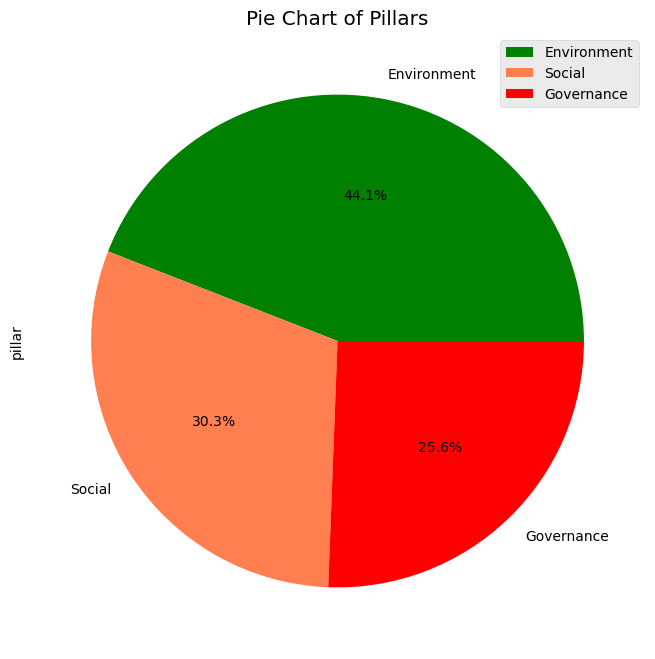

In [34]:
#create a pie chart of the categories of the whole dataset
mpl.style.use('ggplot')
categories = pd.DataFrame(df_final['pillar'].value_counts())

categories.plot(kind = 'pie', y = 'pillar',
                figsize = (10,8),
                autopct = '%1.1f%%', #add percentages
                shadow = False, #do not add shadow
                colors = ['green', 'coral', 'red'],
                explode = [0,0,0],
               title = "Pie Chart of Pillars")

__Inference__: We see that from the final dataset the Environmental Pillar occupies the majority amongst the three indicators.

In [35]:
#number of countries (ISO 3166) per continent
continents = df_final.groupby(['continent'])['country'].nunique().reset_index()
continents

,continent,country
0,Africa,58
1,Americas,54
2,Asia,48
3,Europe,49
4,Oceania,26


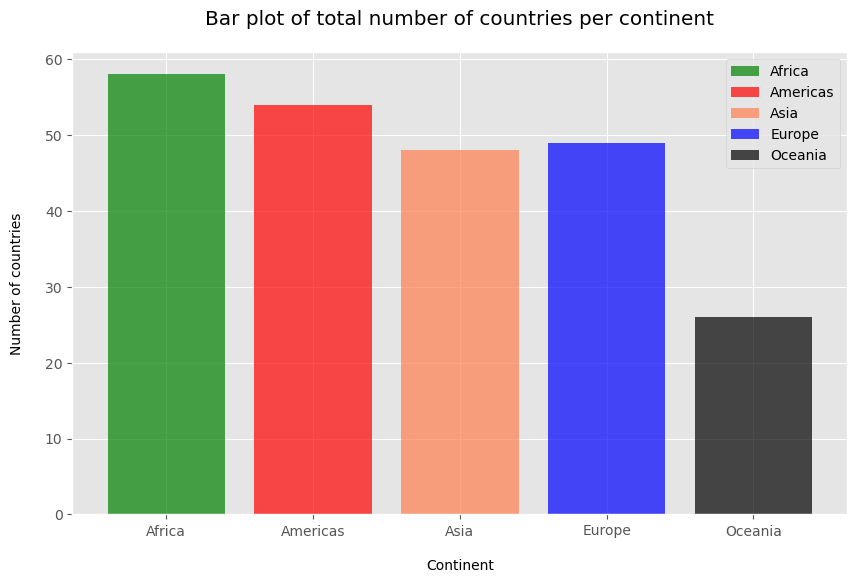

In [36]:

fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(1,1,1)
ax.bar(x = 'continent', height = 'country', data = continents, color = ['green','red','coral','blue','black'],alpha = 0.7,label = 'continent')
ax.set_ylabel('Number of countries',labelpad = 15)
ax.set_xlabel('Continent',labelpad = 15)
ax.set_title('Bar plot of total number of countries per continent',pad = 20)

plt.legend()
plt.show()

__Inference__: The numbers depicted here do not only refer to countries as the column 'country' of the final dataframe df_final refer to all territories following the ISO 3166. For more information see [here](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes).

Finally, let's save the final dataframe which we can use for further processing.

In [37]:
df_final.to_csv("/Users/alexiskorpas/Python ready text files/Projects/Dash/df_esg.csv")